# Using the Poisson-Boltzmann solver with the Mott-Schottky approximation.

As described earlier, space charge models typically consider dopant ions as either mobile or immobile. If the dopant ions are considered immobile, the model follows a Mott-Schottky approximation. If the dopant ions are considered mobile, the model follows a Gouy-Chapman approximation. All the previous examples have demonstrated systems under Gouy-Chapman conditions, where all defects are able to redistribute. In this next example 

```python
for site in all_sites.subset( 'site_2' ):
        site.defect_with_label('defect_2').fixed = True
``` 
        
and the mole fraction of the dopant ion is fixed to the bulk mole fraction throughout the iterations following the Mott-Schottky approximation. 

In [1]:
import os
os.getcwd()

import sys
sys.path.append('/Users/glw33/source/project')

from project.defect_species import Defect_Species
from project.set_of_sites import Set_of_Sites
from project.constants import boltzmann_eV
from project.onedefect_onedopant_calculations import *
from project.general_calculations import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

In [2]:
alpha = 0.0005

conv = 1e-8
grid_x_min = -2.5e-8
grid_x_max = +2.5e-8
limits = [ grid_x_min-5e-10, grid_x_max+5e-10 ]

dielectric = 1

index = 111

b = 5e-9
c = 5e-9

temp = [773.15]

In [3]:
valence = [ +1.0, -1.0 ]
site_labels = ['site_1', 'site_2']
defect_labels = ['defect_1', 'defect_2']
mole_fractions = [ [ 0.2, 0.2 ] ]

In [4]:
desired_mobile_defect_mf = 0.2
percentage_dopant = 20

In [5]:
data_2 = '/Users/glw33/source/project/userguides/input_data/example_data_4_alternate_sites_one_defect.txt' 

In [6]:
boundary_conditions = 'periodic'

for t, m in zip( temp, mole_fractions ):
    defect_species = { l : Defect_Species( l, v, m ) for l, v, m in zip( defect_labels, valence, m) }
    
    all_sites = Set_of_Sites.set_of_sites_from_input_data( data_2, limits, defect_species )
    for site in all_sites.subset( 'site_2' ):
        site.defect_with_label('defect_2').fixed = True
        
    grid = Grid.grid_from_set_of_sites( all_sites, limits[0], limits[1], b, c )
    
    calculation_object = Calculation( grid, alpha, conv, t, boundary_conditions )
    
    calculation_object.solve()
    calculation_object.form_subgrids( site_labels )
    calculation_object.calculate_resistivity_ratio( desired_mobile_defect_mf )
    calculation_object.mole_fractions

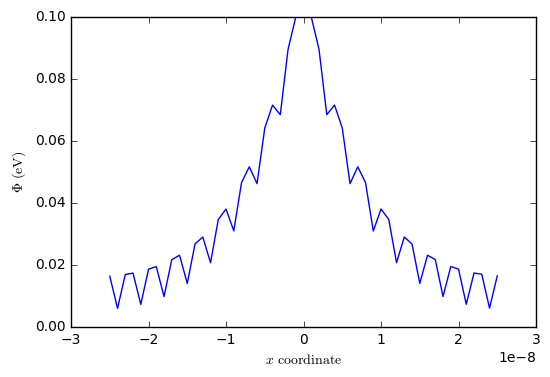

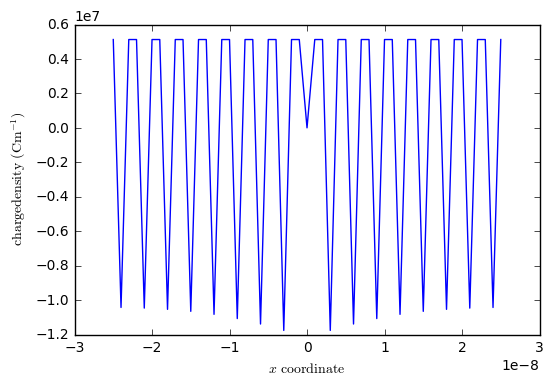

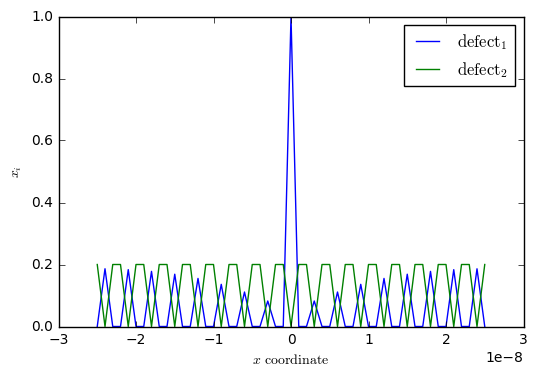

In [8]:
plt.plot(grid.x, calculation_object.phi)
plt.xlabel( '$x$ $\mathrm{coordinate}$' )
plt.ylabel('$\Phi$ $\mathrm{( eV )}$')
plt.show()

plt.plot(grid.x, calculation_object.rho)
plt.xlabel( '$x$ $\mathrm{coordinate}$'  )
plt.ylabel(' $\mathrm{charge density}$ $(\mathrm{C m}^{-1})$')
plt.show()

plt.plot(grid.x, calculation_object.mf[site_labels[0]], label = '$\mathrm{defect_1}$')
plt.plot(grid.x, calculation_object.mf[site_labels[1]], label = '$\mathrm{defect_2}$')
plt.xlabel( '$x$ $\mathrm{coordinate}$'  )
plt.ylabel('$x_{i}$')
plt.legend()
plt.show()

It can be seen in the figures above that when ```fixed = True ``` and the Poisson-Boltzmann equation is being calculated under Mott-schottky conditions ```defect_1``` is able to redistribute whilst ``` defect_2 ``` is fixed to its bulk value. As the negatively charged ```defect_2``` are fixed to its bulk positions they are not electrostatically attracted to the positively charged grain boundary core caused by the segregation of the positively charged ```defect_1```. This causes a larger electrostatic potential at the grain boundary core as the segregation is not limited by the repulsion of the negatively charged defects adjacent to the core and also a broader potential profile as the negatively charged defects are not shielding the positive potential.